<a href="https://colab.research.google.com/github/Harshitha16-star/Customer-Support-Ticket/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [1]:
!pip install "openai==1.57.4"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.3/390.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.59.9
    Uninstalling openai-1.59.9:
      Successfully uninstalled openai-1.59.9


In [2]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 5.6 MB/s eta 0:00:00


In [3]:
GROQ_API_KEY="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"

In [4]:
# Step 2: Import necessary libraries
import os
from groq import Groq

# Step 3: Set your API key securely
# You can either hardcode it (not recommended) or prompt for it
api_key = input("Please enter your Groq API key: ")
client = Groq(api_key=api_key)

# Step 4: Example usage of the Groq client for chat completion
try:
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": "What is the capital of France?"}
        ],
        model="llama-3.3-70b-versatile"  # Specify the model you want to use
    )

    # Print the response content
    print(chat_completion.choices[0].message.content)

except Exception as e:
    print(f"An error occurred: {e}")

Please enter your Groq API key: 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
The capital of France is Paris.


In [6]:
from groq import Groq
import os

os.environ['GROQ_API_KEY'] = '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'
client = Groq(api_key=os.getenv('GROQ_API_KEY'))

In [7]:
import pandas as pd

In [12]:
import json
from groq import Groq

def get_sentiment(title, chat_history):
    client = Groq(api_key="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")

    response = client.chat.completions.create(
        model="llama3-70b-8192",
        messages=[
            {"role": "system", "content": """

You are a Sentiment Analysis Assistant. Your task is to analyze customer-agent interactions and classify the sentiment based on the interaction's context and tone.

### Sentiment Categories:
1. **Positive**: The customer is happy, grateful, or expresses satisfaction after their issue is resolved.
2. **Neutral**: A routine conversation with no strong emotions. The customer neither praises nor complains.
3. **Negative**: The customer expresses dissatisfaction with the resolution, the service, or policies.
4. **Frustrated**: The customer is angry, repeatedly complains, escalates the issue, or shows signs of disappointment.

### Guidelines for Classification:
- If the customer expresses gratitude or indicates that the resolution was helpful, classify it as **Positive**.
- If the interaction lacks any emotional tone and seems transactional, classify it as **Neutral**.
- If the customer disagrees with a resolution, expresses disappointment, or shows dissatisfaction without escalating, classify it as **Negative**.
- If the customer repeatedly expresses dissatisfaction, escalates the issue, or demonstrates strong negative emotions, classify it as **Frustrated**.

### JSON Output:
Provide the response in the following format:
{
  "thought": "Explain the reasoning behind the classification.",
  "sentiment": "positive/neutral/negative/frustrated"
}

### Examples:
1. **Positive Example**:
    - Title: "Order status inquiry"
    - Chat History:
        Agent: Your order has been shipped.
        Customer: Wonderful, thank you!
    - Sentiment: Positive (the customer is satisfied with the update).

2. **Neutral Example**:
    - Title: "Refund time"
    - Chat History:
        Customer: How long will my refund take?
        Agent: Refunds typically take 3-5 days.
        Customer: Okay, thanks.
    - Sentiment: Neutral (transactional, no emotion expressed).

3. **Negative Example**:
    - Title: "Return fee dispute"
    - Chat History:
        Customer: Why do I need to pay a return fee? This is unfair.
        Agent: The return window has expired, so the fee applies.
        Customer: That's ridiculous.
    - Sentiment: Negative (the customer is unhappy with the policy but not escalating).

4. **Frustrated Example**:
    - Title: "Repeated delivery delays"
    - Chat History:
        Customer: This is the third delay! Why can’t you fix this?
        Agent: I’ll escalate this immediately.
        Customer: I’m done with your service.
    - Sentiment: Frustrated (escalation and repeated complaints).

You are an Support Agent. You have to decide on sentiment of the given ticket for which you are given:
    1. Title
    2. Chat History
    and run the fucntion 'save_sentiment' for same.
You are a Support Agent analyzing sentiment. Provide a JSON response.

Classify sentiment as: neutral, positive, negative, or frustrated.

Output JSON format:
{
  "thought": "Reasoning for sentiment",
  "sentiment": "sentiment_type"
}
Example:
1.
...
Agent: Thank you, John. Let me check the status of your order for you. Can you please hold for a moment while I check?
Customer: Yes, I can hold.
[After a brief hold]
Agent: Thank you for holding, John. I have checked the status of your order, and I can confirm that it has been processed and shipped. You should be receiving your sunglasses in the next two to three business days.
Customer: That's great news, Rachel! Thank you for confirming the status of my order.
...
For this the 'sentiment' should be 'positive', as the order has been shipped and the user is happy about it.

2.
...
Customer: Yes, actually, I was wondering if you could give me an estimated delivery date for my order.
Agent: I'd be happy to help with that. Let me check the shipping details for your order.
(Customer is put on hold for a few minutes)
Agent: Thank you for waiting, sir. I have checked the shipping details for your order, and it looks like your Power Bank will be delivered in three business days. Is there anything else I can help you with?
Customer: No, that's all for now. Thank you for your help, Sarah.
...
For this the 'sentiment' should be 'positive', as the Agent was able to handle the request properly and user is happy to know that order will be delivered soon.

3.
...
Agent: Thank you for waiting, I have checked your order details. I see that we have received the sweatshirt back, and it's currently being inspected. Once the inspection is complete, we'll process your refund. However, I must inform you that we charge a return check fee of
5. Is that okay with you?
Customer: What? That's ridiculous! Why should I pay a fee for returning an item that doesn't fit me?
Agent: I understand your frustration, but our return policy clearly states that returns outside of the 30-day window will be subject to a return fee. This is to cover the cost of processing the return and restocking the item.
Customer: I don't care about your policy. This is unacceptable. I want to speak to your supervisor.
Agent: I'm sorry to hear that you're unhappy with our policy. However, I'm a junior agent and I'm authorized to handle customer inquiries independently. I'll do my best to assist you. Is there anything else I can do to help you with the return?
Customer: No, I just want to return the shorts without paying any fees.
Agent: I understand. Let me check if there's anything I can do to waive the return fee for you. Can you please hold for a moment?
Customer: Okay.
(Agent puts the customer on hold for a few minutes)
Agent: Thank you for holding. I'm sorry, but I'm not authorized to waive the return fee. However, if you're willing to exchange the shorts for a different size or color, we can waive the return fee and cover the cost of shipping the new item to you. Would you like to do that?
Customer: No, I don't want to exchange the shorts. I just want to return them and get my money back.
Agent: I understand. I'm sorry, but we're unable to waive the return fee in this case. If you have any other questions or concerns, please feel free to reach out to us. Is there anything else I can assist you with?
Customer: No, that's all. This is really disappointing.
...
For this the 'sentiment' should be 'negative', but not 'frustrated' because as an online aggregator we have a fixed policy and customers should read that policy before buying. For us this doesn't come under our purview to return after 30 days and we still tried to provide exchange, whoch customer rejected.

    """},
            {"role": "user", "content": f"Analyze sentiment for Title: '{title}' and Chat History: '{chat_history}'"}
        ],
        response_format={"type": "json_object"}
    )

    try:
        result = json.loads(response.choices[0].message.content)
        print(result.get('thought', 'No thought provided'))
        return result.get('sentiment', 'neutral')
    except Exception as e:
        print(f"Error parsing response: {e}")
        return 'neutral'

# Sample usage with pandas
import pandas as pd

try:
    df = pd.read_parquet('train-00000-of-00001-a5a7c6e4bb30b016.parquet')
    print("Parquet file loaded successfully.")
except Exception as e:
    print(f"Error loading parquet file: {e}")



Parquet file loaded successfully.


In [ ]:
#https://huggingface.co/datasets/NebulaByte/E-Commerce_Customer_Support_Conversations

In [14]:
!pip install pyarrow
try:
    df = pd.read_parquet("hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet")
    print("Parquet file loaded successfully.")
except Exception as e:
    print(f"Error loading parquet file: {e}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Parquet file loaded successfully.


In [ ]:
df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


In [ ]:
df.shape

(1000, 11)

In [ ]:
df['issue_area'].value_counts()
len(df['issue_area'].value_counts())

6

In [ ]:
df['issue_category'].unique()
len(df['issue_category'].unique())

40

In [ ]:
df['issue_sub_category'].unique()
len(df['issue_sub_category'].unique())

109

In [ ]:
df["issue_complexity"].value_counts()

,count
issue_complexity,
less,488
medium,426
high,86


In [ ]:
df["customer_sentiment"].value_counts()

,count
customer_sentiment,
neutral,552
negative,316
frustrated,105
positive,27


In [ ]:
df["product_category"].value_counts()

,count
product_category,
Appliances,465
Electronics,303
Men/Women/Kids,232


In [ ]:
df["agent_experience_level"].value_counts()

,count
agent_experience_level,
junior,507
experienced,348
inexperienced,145


In [ ]:
df["issue_area"].value_counts()

,count
issue_area,
Cancellations and returns,286
Order,270
Login and Account,151
Shopping,116
Warranty,105
Shipping,72


In [ ]:
df.loc[df['issue_complexity'].eq('high'),'agent_experience_level'].value_counts()

,count
agent_experience_level,
junior,46
experienced,31
inexperienced,9


In [ ]:
df.loc[df['agent_experience_level'].eq("junior"),'customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,266
negative,169
frustrated,54
positive,18


In [ ]:
df.loc[df['agent_experience_level'].eq("experienced"),'customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,191
negative,111
frustrated,39
positive,7


In [ ]:
df.loc[df['agent_experience_level'].eq("inexperienced"),'customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,95
negative,36
frustrated,12
positive,2


In [ ]:
df.loc[df['agent_experience_level'].eq("junior"),'customer_sentiment'].value_counts()/df.loc[df['agent_experience_level'].eq("junior"),'customer_sentiment'].value_counts().sum() * 100


,count
customer_sentiment,
neutral,52.465483
negative,33.333333
frustrated,10.650888
positive,3.550296


In [ ]:
df.loc[df['agent_experience_level'].eq("experienced"),'customer_sentiment'].value_counts()/df.loc[df['agent_experience_level'].eq("inexperienced"),'customer_sentiment'].value_counts().sum() * 100


,count
customer_sentiment,
neutral,131.724138
negative,76.551724
frustrated,26.896552
positive,4.827586


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode 'issue_complexity'
df['issue_complexity_encoded'] = label_encoder.fit_transform(df['issue_complexity'])

# Label encode 'customer_sentiment'
df['customer_sentiment_encoded'] = label_encoder.fit_transform(df['customer_sentiment'])

df.head(10)

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,issue_complexity_encoded,customer_sentiment_encoded
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,2,2
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,1,2
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,2,2
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi...",1,2
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...,2,1
5,Login and Account,Account Reactivation and Deactivation,Reactivating an inactive account,Account Reactivation and Deactivation -> React...,negative,Appliances,Wet Grinder,medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,2,1
6,Cancellations and returns,Cash on Delivery (CoD) Refunds,Refund timelines for Cash on Delivery returns,Cash on Delivery (CoD) Refunds -> Refund timel...,frustrated,Appliances,Water Purifier,medium,inexperienced,"may struggle with ambiguous queries, rely on c...","Agent: Hello, thank you for contacting BrownBo...",2,0
7,Shopping,Product Availability and Status,Ordering 'Out of Stock' or 'Temporarily Unavai...,Product Availability and Status -> Ordering 'O...,neutral,Men/Women/Kids,Shoes,less,experienced,"confidently handles complex customer issues, e...","Agent: Hello, thank you for calling BrownBox C...",1,2
8,Order,Product Installation,Installation after delivery,Product Installation -> Installation after del...,negative,Electronics,DSLR Camera,medium,inexperienced,"may struggle with ambiguous queries, rely on c...","Agent: Hello, thank you for contacting BrownBo...",2,1
9,Login and Account,Mobile Number and Email Verification,Issues with receiving the OTP or verification ...,Mobile Number and Email Verification -> Issues...,negative,Appliances,Kitchen Chimney,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,1,1


In [ ]:
df['customer_sentiment_encoded'].value_counts()

,count
customer_sentiment_encoded,
2,552
1,316
0,105
3,27


In [ ]:
correlation_matrix = df[['issue_complexity_encoded', 'customer_sentiment_encoded']].corr()

print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,issue_complexity_encoded,customer_sentiment_encoded
issue_complexity_encoded,1.000000,-0.040395
customer_sentiment_encoded,-0.040395,1.000000


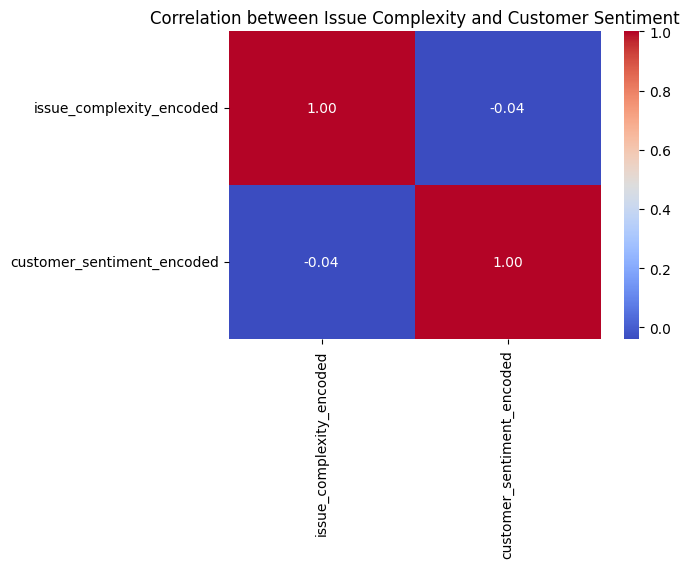

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Issue Complexity and Customer Sentiment')
plt.show()

Complexity: medium
customer_sentiment
neutral       237
negative      130
frustrated     48
positive       11
Name: count, dtype: int64
--------------------


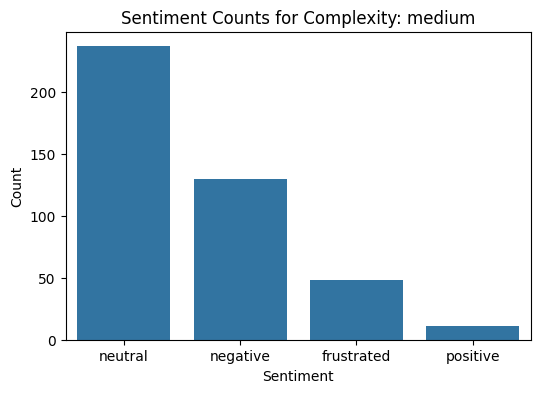

Complexity: less
customer_sentiment
neutral       274
negative      156
frustrated     45
positive       13
Name: count, dtype: int64
--------------------


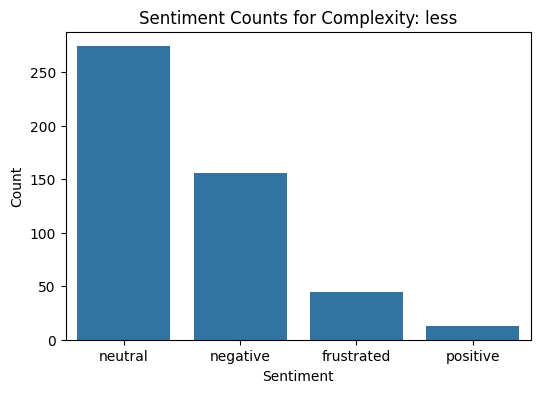

Complexity: high
customer_sentiment
neutral       41
negative      30
frustrated    12
positive       3
Name: count, dtype: int64
--------------------


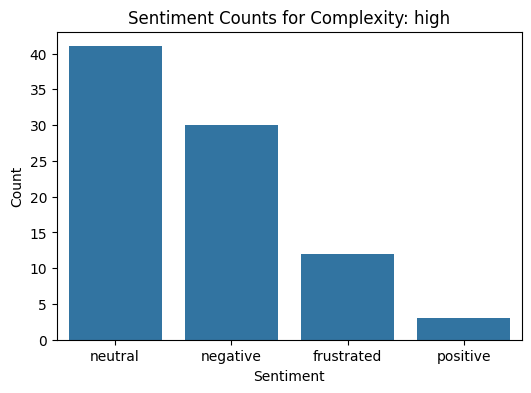

In [ ]:
for complexity in df["issue_complexity"].unique():
    print(f"Complexity: {complexity}")
    sentiment_counts = df[df["issue_complexity"] == complexity]["customer_sentiment"].value_counts()
    print(sentiment_counts)
    print("-" * 20)

    # Optional: Plotting
    plt.figure(figsize=(6, 4))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
    plt.title(f"Sentiment Counts for Complexity: {complexity}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()